In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


num_transactions = 50_000
num_customers = 5_000
num_products = 200


customers = pd.DataFrame({
    'customer_id': range(1, num_customers + 1),
    'age': np.random.randint(18, 70, num_customers),
    'gender': np.random.choice(['Male', 'Female'], num_customers, p=[0.45, 0.55]),
    'city': np.random.choice(['Warszawa', 'Kraków', 'Wrocław', 'Poznań', 'Gdańsk'], num_customers, p=[0.3, 0.2, 0.2, 0.15, 0.15])
})


categories = ['Napoje', 'Przekąski', 'Alkohol', 'Produkty świeże', 'Nabiał', 'Pieczywo', 'Słodycze', 'Mrożonki']
products = pd.DataFrame({
    'product_id': range(1, num_products + 1),
    'category': np.random.choice(categories, num_products),
    'product_name': [f'Produkt_{i}' for i in range(1, num_products + 1)],
    'price': np.round(np.random.uniform(1.5, 30, num_products), 2)
})


transactions = pd.DataFrame({
    'transaction_id': range(1, num_transactions + 1),
    'customer_id': np.random.choice(customers['customer_id'], num_transactions),
    'product_id': np.random.choice(products['product_id'], num_transactions),
    'quantity': np.random.randint(1, 5, num_transactions),
    'purchase_date': pd.to_datetime(np.random.choice(pd.date_range('2024-01-01', '2024-12-31'), num_transactions))
})


merged_df = transactions.merge(customers, on='customer_id').merge(products, on='product_id')


In [16]:
transactions['month'] = transactions['purchase_date'].dt.month
transactions_per_month = transactions.groupby('month')['transaction_id'].count().sort_index()
transactions_per_month


month
1     4244
2     4024
3     4170
4     4014
5     4199
6     4098
7     4308
8     4262
9     4181
10    4185
11    4082
12    4233
Name: transaction_id, dtype: int64

In [17]:
merged_df['total_sales'] = merged_df['quantity'] * merged_df['price']
sales_per_category = merged_df.groupby('category')['total_sales'].sum().sort_values(ascending=False)
sales_per_category


category
Przekąski          314360.25
Nabiał             276047.34
Mrożonki           255924.59
Słodycze           245845.48
Alkohol            245091.67
Pieczywo           198929.07
Produkty świeże    181878.52
Napoje             177158.41
Name: total_sales, dtype: float64

In [18]:
avg_cart_value = merged_df.groupby('transaction_id')['total_sales'].sum().mean()
avg_cart_value


37.904706600000004

In [19]:
best_selling_product = merged_df.groupby('product_name')['quantity'].sum().idxmax()
best_selling_product


'Produkt_110'

In [20]:
avg_quantity_per_transaction = merged_df.groupby('transaction_id')['quantity'].sum().mean()
avg_quantity_per_transaction


2.50096

In [21]:
sales_per_city = merged_df.groupby('city')['total_sales'].sum().sort_values(ascending=False)
sales_per_city


city
Warszawa    581631.09
Wrocław     381087.74
Kraków      369704.00
Poznań      288479.15
Gdańsk      274333.35
Name: total_sales, dtype: float64

In [22]:
sales_per_gender = merged_df.groupby('gender')['total_sales'].sum()
sales_per_gender


gender
Female    1057033.71
Male       838201.62
Name: total_sales, dtype: float64

In [23]:
top_3_products = merged_df['product_name'].value_counts().head(3)
top_3_products


product_name
Produkt_152    284
Produkt_102    281
Produkt_39     279
Name: count, dtype: int64

In [24]:
avg_price_per_category = products.groupby('category')['price'].mean().sort_values(ascending=False)
avg_price_per_category


category
Mrożonki           16.385200
Alkohol            15.807200
Produkty świeże    15.620000
Słodycze           15.616800
Przekąski          14.971212
Pieczywo           14.523182
Nabiał             14.512333
Napoje             13.790952
Name: price, dtype: float64

In [25]:
merged_df['day_of_week'] = merged_df['purchase_date'].dt.day_name()
transactions_per_day = merged_df['day_of_week'].value_counts()
transactions_per_day


day_of_week
Tuesday      7186
Saturday     7178
Thursday     7176
Monday       7160
Sunday       7119
Friday       7112
Wednesday    7069
Name: count, dtype: int64

In [26]:
top_customers = merged_df.groupby('customer_id')['total_sales'].sum().nlargest(5)
top_customers


customer_id
4210    1093.77
4612    1022.91
3537    1014.98
3614    1000.37
3080     971.07
Name: total_sales, dtype: float64

In [27]:
avg_transactions_per_customer = merged_df.groupby('customer_id')['transaction_id'].nunique().mean()
avg_transactions_per_customer


10.0

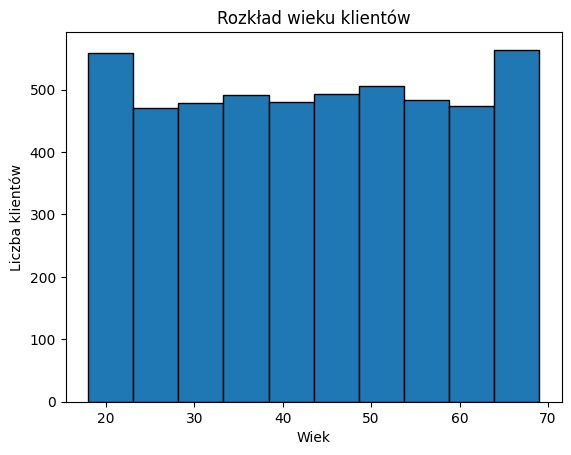

In [28]:


plt.hist(customers['age'], bins=10, edgecolor='black')
plt.xlabel('Wiek')
plt.ylabel('Liczba klientów')
plt.title('Rozkład wieku klientów')
plt.show()


<Axes: title={'center': 'Średnia wartość transakcji w miesiącach'}, xlabel='purchase_date'>

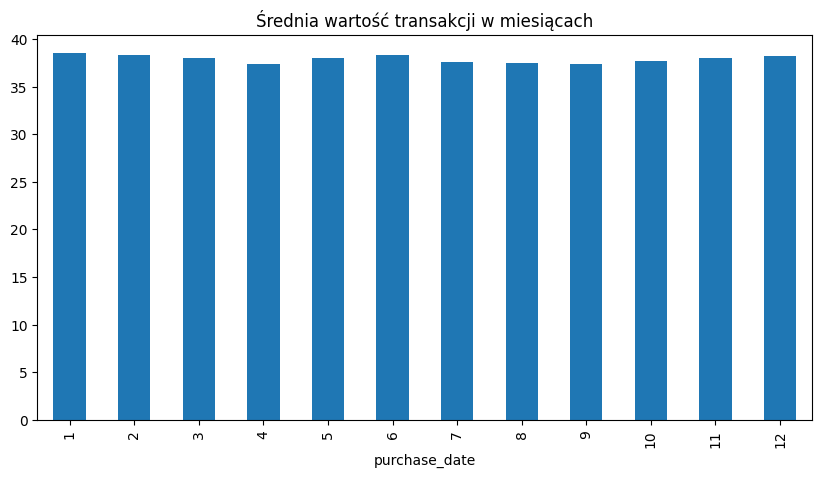

In [29]:
avg_sales_per_month = merged_df.groupby(merged_df['purchase_date'].dt.month)['total_sales'].mean()
avg_sales_per_month.plot(kind='bar', figsize=(10,5), title='Średnia wartość transakcji w miesiącach')


In [30]:
popular_category_by_gender = merged_df.groupby(['gender', 'category'])['transaction_id'].count().reset_index()
popular_category_by_gender = popular_category_by_gender.loc[popular_category_by_gender.groupby('gender')['transaction_id'].idxmax()]
popular_category_by_gender


,gender,category,transaction_id
6,Female,Przekąski,4686
14,Male,Przekąski,3698
